# Importamos las librerías

In [80]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder

In [81]:
plt.style.use("ggplot")

# Importamos los datos

In [82]:
df_1 = pd.read_csv("/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/Nuclio Projects/Projects/Supervised Learning/Binary-Classifier-JFK-main/JFK_flights_data1.csv", index_col = 0)

In [83]:
df_2 = pd.read_csv("/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/Nuclio Projects/Projects/Supervised Learning/Binary-Classifier-JFK-main/JFK_flights_data2.csv", index_col = 0)

In [84]:
df_1.shape

(100000, 15)

In [85]:
df_1.head(1)

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
0,2018-02-01,20363.0,N299PQ,BNA,"Nashville, TN",Tennessee,JFK,"New York, NY",New York,1359,27.0,1719,0.0,140.0,765.0


In [86]:
df_2.shape

(150152, 15)

In [87]:
df_2.head(1)

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
100000,2019-08-23,20363.0,N605LR,IND,"Indianapolis, IN",Indiana,JFK,"New York, NY",New York,1922,13.0,2145,0.0,143.0,665.0


In [88]:
df_3 = pd.concat([df_1, df_2], axis = 0, ignore_index = True)

In [89]:
df_3.describe()

,OP_CARRIER_AIRLINE_ID,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
count,237644.000000,250152.000000,232641.000000,250152.000000,250152.000000,250152.000000,250152.000000
mean,20152.000736,1334.611164,18.189820,1419.131404,0.210400,195.647706,1258.844866
std,297.881929,529.100385,9.609596,580.986009,0.407594,97.374339,898.116163
min,19690.000000,3.000000,1.000000,1.000000,0.000000,47.000000,94.000000
25%,19790.000000,915.000000,12.000000,944.000000,0.000000,109.000000,427.000000
50%,20363.000000,1258.000000,16.000000,1455.000000,0.000000,167.000000,1028.000000
75%,20409.000000,1744.000000,21.000000,1914.000000,0.000000,306.000000,2248.000000
max,21171.000000,2359.000000,166.000000,2400.000000,1.000000,595.000000,4983.000000


In [90]:
df_3.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250152 entries, 0 to 250151
Columns: 15 entries, FL_DATE to DISTANCE
dtypes: float64(5), int64(2), object(8)
memory usage: 28.6+ MB


In [91]:
df_3.reset_index(drop=True, inplace=True)

# Visualización de datos

In [92]:
df_3.columns

Index(['FL_DATE', 'OP_CARRIER_AIRLINE_ID', 'TAIL_NUM', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_NM', 'CRS_DEP_TIME', 'TAXI_OUT', 'CRS_ARR_TIME',
       'ARR_DEL15', 'CRS_ELAPSED_TIME', 'DISTANCE'],
      dtype='object')

In [93]:
df_3.head(3).T

,0,1,2
FL_DATE,2018-02-01,2018-02-01,2018-02-01
OP_CARRIER_AIRLINE_ID,20363.0,20363.0,20363.0
TAIL_NUM,N299PQ,N920XJ,N605LR
ORIGIN,BNA,RDU,BUF
ORIGIN_CITY_NAME,"Nashville, TN","Raleigh/Durham, NC","Buffalo, NY"
ORIGIN_STATE_NM,Tennessee,North Carolina,New York
DEST,JFK,JFK,JFK
DEST_CITY_NAME,"New York, NY","New York, NY","New York, NY"
DEST_STATE_NM,New York,New York,New York
CRS_DEP_TIME,1359,1354,1529


In [94]:
TARGET = "ARR_DEL15"

# Data Understanding

## Estadísticos descriptivos

In [95]:
df_3.describe().T

,count,mean,std,min,25%,50%,75%,max
OP_CARRIER_AIRLINE_ID,237644.0,20152.000736,297.881929,19690.0,19790.0,20363.0,20409.0,21171.0
CRS_DEP_TIME,250152.0,1334.611164,529.100385,3.0,915.0,1258.0,1744.0,2359.0
TAXI_OUT,232641.0,18.189820,9.609596,1.0,12.0,16.0,21.0,166.0
CRS_ARR_TIME,250152.0,1419.131404,580.986009,1.0,944.0,1455.0,1914.0,2400.0
ARR_DEL15,250152.0,0.210400,0.407594,0.0,0.0,0.0,0.0,1.0
CRS_ELAPSED_TIME,250152.0,195.647706,97.374339,47.0,109.0,167.0,306.0,595.0
DISTANCE,250152.0,1258.844866,898.116163,94.0,427.0,1028.0,2248.0,4983.0


In [96]:
df_3.describe(include=["object"]).T

,count,unique,top,freq
FL_DATE,250152,730,2018-07-19,394
TAIL_NUM,235143,2645,N110AN,761
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137
DEST,250152,1,JFK,250152
DEST_CITY_NAME,250152,1,"New York, NY",250152
DEST_STATE_NM,250152,1,New York,250152


# Número de Nulos

In [97]:
df_3.select_dtypes(include=["object"]).isnull().sum()

FL_DATE                 0
TAIL_NUM            15009
ORIGIN                  0
ORIGIN_CITY_NAME        0
ORIGIN_STATE_NM         0
DEST                    0
DEST_CITY_NAME          0
DEST_STATE_NM           0
dtype: int64

In [98]:
df_3.select_dtypes(exclude=["object"]).isnull().sum()

OP_CARRIER_AIRLINE_ID    12508
CRS_DEP_TIME                 0
TAXI_OUT                 17511
CRS_ARR_TIME                 0
ARR_DEL15                    0
CRS_ELAPSED_TIME             0
DISTANCE                     0
dtype: int64

# Distribución del TARGET

In [99]:
df_3[TARGET].mean()

0.21040007675333397

# Exploración de variables

## Fechas

In [100]:
LAX_df = df_3[df_3["ORIGIN"] == "LAX"]

In [101]:
LAX_df.head(1)

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
34,2018-02-01,19805.0,N104NN,LAX,"Los Angeles, CA",California,JFK,"New York, NY",New York,1530,40.0,2359,1.0,329.0,2475.0


In [102]:
LAX_df_dia = LAX_df[["FL_DATE", TARGET]].groupby("FL_DATE").mean()

In [103]:
LAX_df_dia.head(15)

,ARR_DEL15
FL_DATE,
2018-01-01,0.322581
2018-01-02,0.371429
2018-01-03,0.107143
2018-01-04,0.500000
2018-01-05,0.724138
2018-01-06,0.636364
2018-01-07,0.694444
2018-01-08,0.485714
2018-01-09,0.135135


In [104]:
LAX_df_dia.index

Index(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
       '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09', '2018-01-10',
       ...
       '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
       '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31'],
      dtype='object', name='FL_DATE', length=730)

In [105]:
LAX_df_dia.index = pd.to_datetime(LAX_df_dia.index)

<Axes: xlabel='FL_DATE'>

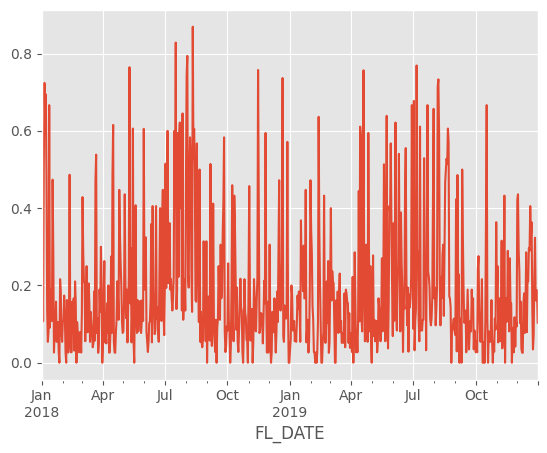

In [106]:
LAX_df_dia[TARGET].plot()

In [107]:
media_retrasos_semana = LAX_df_dia[TARGET].resample("M").mean()

<Axes: xlabel='FL_DATE'>

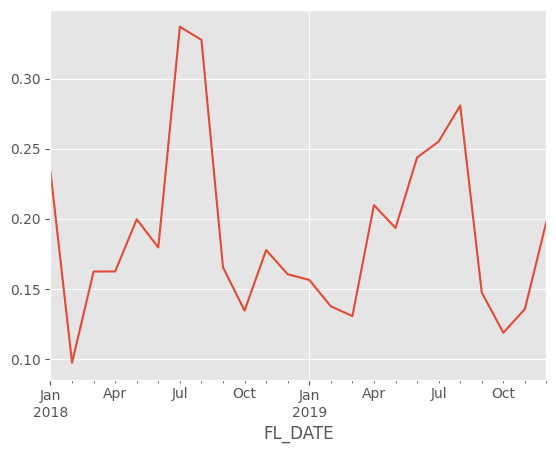

In [108]:
media_retrasos_semana.plot()

In [109]:
#Conclusiones:

#Verano y navidad hay mas retrasos
#Febrero es un mes con pocos retrasos

In [110]:
#Data preparation:

#Extraer mes, año, día, trimestre, semana

# Análisis Variables Numéricas

<Axes: ylabel='Frequency'>

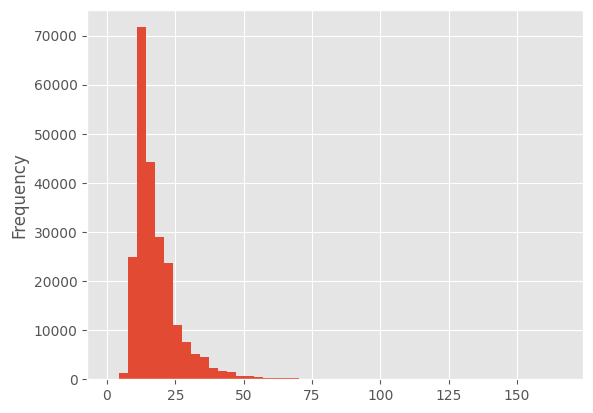

In [111]:
#Data Preparation
df_3["TAXI_OUT"].plot(kind="hist", bins = 50)

In [112]:
#Como se relaciona la variable target. ¿Es informativa?

<Axes: xlabel='ARR_DEL15', ylabel='TAXI_OUT'>

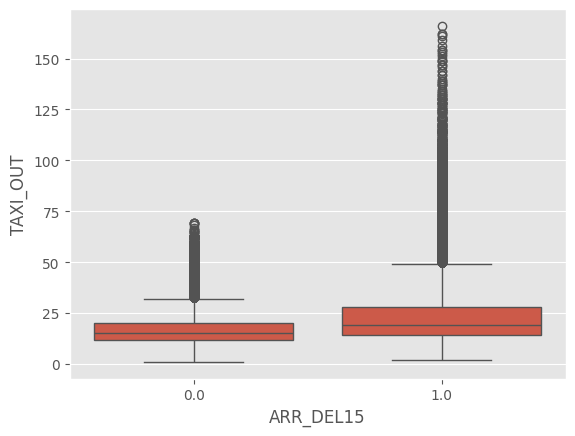

In [113]:
sns.boxplot(data = df_3, x = TARGET, y = "TAXI_OUT")

<Axes: ylabel='Density'>

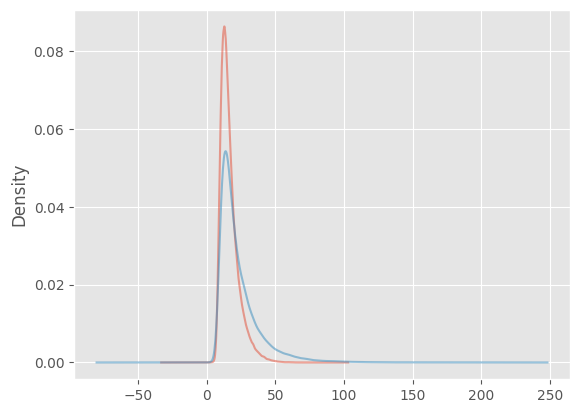

In [114]:
df_3[df_3[TARGET] == 0]["TAXI_OUT"].plot(kind="density", alpha=.5)
df_3[df_3[TARGET] == 1]["TAXI_OUT"].plot(kind="density", alpha=.5)

In [115]:
#Conclusiones:
#En "TAXI_OUT" bajo, normalmente no hay retrasos en el vuelo.
#En "TAXI_OUT" alto, normalmente si los hay.

In [116]:
#Transofrmaciones: Nulos
#Vamos a utilizar de base un algoritrmo s¡mbolista. Por lo tano, metemos como valor extremo -1

# Variables Categóricas

In [117]:
df_3.pivot_table(index="ORIGIN", values=TARGET, aggfunc=["count", "sum", "mean"]).sort_values(by=[("mean", "ARR_DEL15")], ascending=False).head(10)

,count,sum,mean
,ARR_DEL15,ARR_DEL15,ARR_DEL15
ORIGIN,,,
IAH,192,71.0,0.369792
ORD,5647,1705.0,0.301930
HNL,754,222.0,0.294430
HOU,648,189.0,0.291667
ACK,919,263.0,0.286181
EGE,161,46.0,0.285714
HYA,171,47.0,0.274854
PHL,851,233.0,0.273796


In [118]:
#Conclusión:
#El aeropuerto IAH es el que mas se retrasa por una media del 37% que contrasta con el 21% de media.
#Es más importane ell aeropuerto de ORD porque tiene una media de retrasos del 30% y afecta a muchos mas vuelos.

In [119]:
df_3.pivot_table(index="ORIGIN", values=TARGET, aggfunc=["count", "sum", "mean"]).sort_values(by=[("mean", "ARR_DEL15")], ascending=False).tail(10)

,count,sum,mean
,ARR_DEL15,ARR_DEL15,ARR_DEL15
ORIGIN,,,
ROC,4181,740.0,0.176991
LAS,7377,1258.0,0.170530
MSP,2806,471.0,0.167855
ORH,577,96.0,0.166378
PDX,2528,405.0,0.160206
BGR,442,67.0,0.151584
SMF,684,101.0,0.147661
STT,478,65.0,0.135983


# Data Preparation

## Limpieza de atributos

### Transformación de tipos

#### Numéricas que son categóricas

In [120]:
df_3["AEROLINEA"] = df_3["OP_CARRIER_AIRLINE_ID"].astype(object)

In [121]:
df_3.select_dtypes(include=["object"]).describe().T

,count,unique,top,freq
FL_DATE,250152,730,2018-07-19,394
TAIL_NUM,235143,2645,N110AN,761
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137
DEST,250152,1,JFK,250152
DEST_CITY_NAME,250152,1,"New York, NY",250152
DEST_STATE_NM,250152,1,New York,250152
AEROLINEA,237644.0,11.0,20409.0,78587.0


In [122]:
df_3.drop("OP_CARRIER_AIRLINE_ID", axis=1, inplace=True)

#### Imputación de Nulos

##### Categóricas

In [123]:
df_3.select_dtypes(include=["object"]).isnull().sum()

FL_DATE                 0
TAIL_NUM            15009
ORIGIN                  0
ORIGIN_CITY_NAME        0
ORIGIN_STATE_NM         0
DEST                    0
DEST_CITY_NAME          0
DEST_STATE_NM           0
AEROLINEA           12508
dtype: int64

In [124]:
# TAIL_NUM

In [125]:
df_3["TAIL_NUM"].value_counts(dropna=False)

TAIL_NUM
NaN       15009
N110AN      761
N113AN      751
N111ZM      748
N115NN      740
          ...  
N197UW        1
N986AN        1
N315RJ        1
N801AW        1
N945DN        1
Name: count, Length: 2646, dtype: int64

In [126]:
valor_nulo = "NULO"

In [127]:
df_3["TAIL_NUM"].fillna(value=valor_nulo, inplace=True)

In [128]:
df_3["AEROLINEA"].fillna(value=valor_nulo, inplace=True)

##### Numérica

In [129]:
df_3.select_dtypes(exclude=["object"]).isnull().sum()

CRS_DEP_TIME            0
TAXI_OUT            17511
CRS_ARR_TIME            0
ARR_DEL15               0
CRS_ELAPSED_TIME        0
DISTANCE                0
dtype: int64

In [130]:
df_3["TAXI_OUT"].fillna(value= -1, inplace=True)

# Eliminar las variables con poca varianza

In [131]:
non_variance_features = ["DEST", "DEST_CITY_NAME", "DEST_STATE_NM"]

In [132]:
df_3.drop(non_variance_features, axis=1, inplace=True)

## Variables de fechas

In [133]:
df_3["FL_DATE"] = pd.to_datetime(df_3["FL_DATE"])

In [134]:
df_3["FL_DATE"].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
250147    2018
250148    2018
250149    2018
250150    2018
250151    2018
Name: FL_DATE, Length: 250152, dtype: int32

In [135]:
df_3["Year"] = df_3["FL_DATE"].dt.year
df_3["Season"] = df_3["FL_DATE"].dt.quarter
df_3["Month"] = df_3["FL_DATE"].dt.month
df_3["Day"] = df_3["FL_DATE"].dt.day
df_3["Week"] = df_3["FL_DATE"].dt.isocalendar().week
df_3["Weekday"] = df_3["FL_DATE"].dt.weekday

In [136]:
df_3["Weekday"].value_counts() #Los días 5 y 6 son los findes siendo el 0 los lunes.

Weekday
0    37183
4    36848
3    36679
6    36288
1    35945
2    35443
5    31766
Name: count, dtype: int64

In [137]:
df_3.pivot_table(index="Weekday", values=TARGET, aggfunc=["count", "sum", "mean"]).sort_values(by=[("mean", "ARR_DEL15")], ascending=False).head(10)

,count,sum,mean
,ARR_DEL15,ARR_DEL15,ARR_DEL15
Weekday,,,
4,36848,8729.0,0.236892
3,36679,8512.0,0.232067
0,37183,7811.0,0.210069
2,35443,7358.0,0.207601
6,36288,7326.0,0.201885
1,35945,7255.0,0.201836
5,31766,5641.0,0.177580


In [138]:
df_3.drop("FL_DATE", axis=1, inplace=True)

## Tratamiento de categóricas

In [139]:
df_3.select_dtypes(include="object").describe().T

,count,unique,top,freq
TAIL_NUM,250152,2646,NULO,15009
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137
AEROLINEA,250152.0,12.0,20409.0,78587.0


In [140]:
#TAIL_NUM: FREQUENCY ENCODING / OHE después de agrupar en otros minoritarios
#ORIGIN: OHE
#ORIGIN_CITY_NAME: OHE
#ORIGIN_STATE_NM: OHE
#AEROLINEA: OHE
#UTILIZARÉ OHE EN TODAS AQUELLAS VARIABLES QUE TENGAN MENOS DE 100 ETIQUETAS DE PRIMERA OPCIÓN.

#### TAIL_NUM: FE

In [141]:
df_3.pivot_table(index="TAIL_NUM", values=TARGET, aggfunc=[len, "sum", "mean"]).sort_values(by=[("len", "ARR_DEL15")], ascending=False).head(10)

,len,sum,mean
,ARR_DEL15,ARR_DEL15,ARR_DEL15
TAIL_NUM,,,
NULO,15009,3109.0,0.207142
N110AN,761,164.0,0.215506
N113AN,751,134.0,0.178429
N111ZM,748,162.0,0.216578
N109NN,740,118.0,0.159459
N115NN,740,121.0,0.163514
N112AN,737,151.0,0.204885
N116AN,723,147.0,0.203320


In [142]:
df_tail_num = pd.DataFrame(df_3["TAIL_NUM"].value_counts())

In [143]:
df_tail_num.columns = ["TAIL_NUM_COUNT"]

In [144]:
df_tail_num ["TAIL_NUM_2"]= df_tail_num.index

In [145]:
df_tail_num

,TAIL_NUM_COUNT,TAIL_NUM_2
TAIL_NUM,,
NULO,15009,NULO
N110AN,761,N110AN
N113AN,751,N113AN
N111ZM,748,N111ZM
N115NN,740,N115NN
...,...,...
N197UW,1,N197UW
N986AN,1,N986AN
N315RJ,1,N315RJ


In [146]:
df_3 = df_3.merge(df_tail_num, on = "TAIL_NUM")

In [147]:
df_3.drop("TAIL_NUM", axis= 1, inplace = True)

### OHE

In [150]:
pd.get_dummies(df_3["ORIGIN"])

,ABQ,ACK,ATL,AUS,BGR,BNA,BOS,BQN,BTV,BUF,...,SFO,SJC,SJU,SLC,SMF,SNA,SRQ,STT,SYR,TPA
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250147,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
250148,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
250149,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
250150,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
